In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)

In [3]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

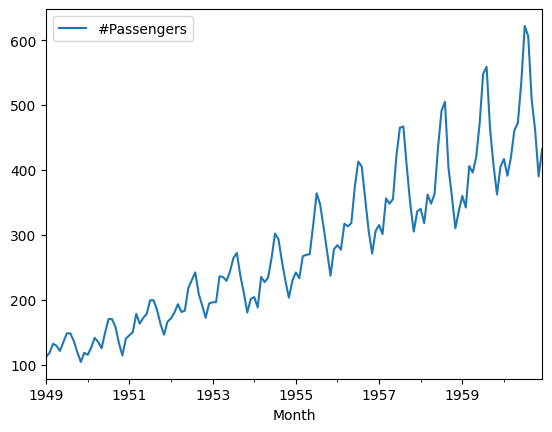

In [4]:
df.plot()

# Filtering by Date

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.loc["1950":"1955"]

,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
...,...
1955-08-01,347
1955-09-01,312
1955-10-01,274


#### Plot a single year

<Axes: xlabel='Month'>

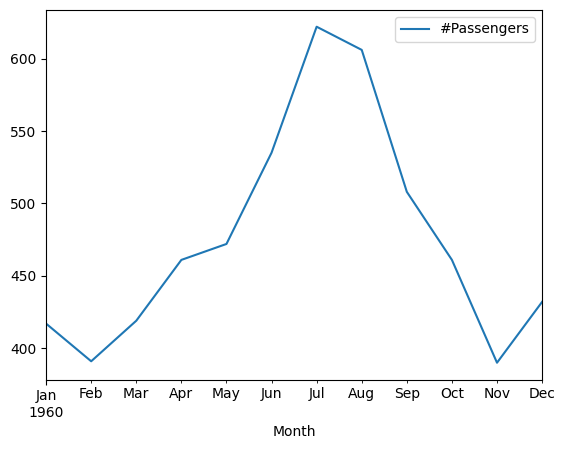

In [7]:
df.loc["1960"].plot()

#### Slice by date

In [8]:
df.loc["1950-01":"1950-06"]

,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149


# Resample to Quaterly

### First we need to change the day to the last day of month

In [9]:
df.index = df.index.to_period()

In [10]:
df

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [11]:
df.asfreq(freq="Q")

,#Passengers
Month,
1949Q1,112
1949Q1,118
1949Q1,132
1949Q2,129
1949Q2,121
...,...
1960Q3,606
1960Q3,508
1960Q4,461


<Axes: xlabel='Month'>

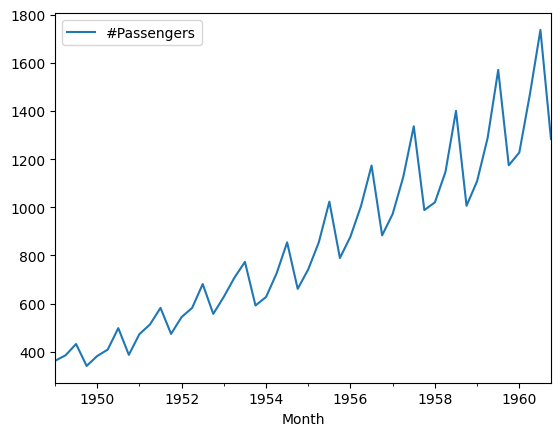

In [12]:
df.groupby(
    df.asfreq(freq="Q").index
).sum().plot()

In [13]:
df["12_month_average"] = df.rolling(12).mean()

In [14]:
df

,#Passengers,12_month_average
Month,,
1949-01,112,NaN
1949-02,118,NaN
1949-03,132,NaN
1949-04,129,NaN
1949-05,121,NaN
...,...,...
1960-08,606,463.333333
1960-09,508,467.083333
1960-10,461,471.583333


<Axes: xlabel='Month'>

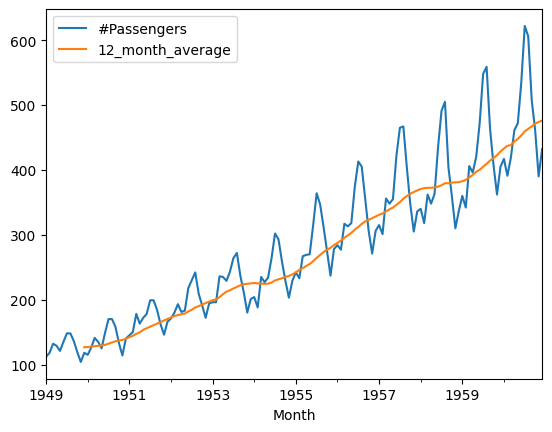

In [15]:
df.plot()